Import modules and dataset

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [106]:
#Import dataset (this is a subset data from the R notebook, contains the 1000 videos with the most views)
videos = pd.read_csv("df1.csv")

In [107]:
videos.shape

(1000, 13)

Sentiment analysis

In [82]:
!python -m pip install -U textblob

  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)
Processing ./.cache/pip/wheels/45/6c/46/a1865e7ba706b3817f5d1b2ff7ce8996aabdd0d03d47ba0266/nltk-3.5-py3-none-any.whl
  Using cached regex-2021.3.17-cp37-cp37m-manylinux2014_x86_64.whl (721 kB)


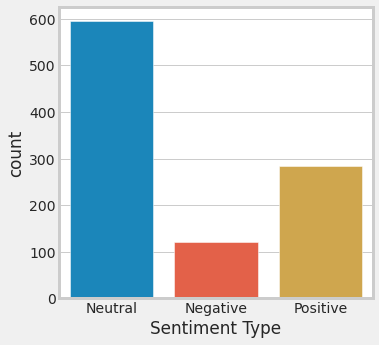

In [10]:
from textblob import TextBlob

bloblist_title = list()

#Apply textblob in every row
videos_title_str=videos['title']
for row in videos_title_str:
    blob = TextBlob(row)
    bloblist_title.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    videos_polarity_title = pd.DataFrame(bloblist_title, columns = ['sentence','sentiment','polarity'])

#Sort into positive, neutral or negative
def f_title(videos_polarity_title):
    if videos_polarity_title['sentiment'] > 0:
        val = "Positive"
    elif videos_polarity_title['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

#Create graph
videos_polarity_title['Sentiment Type'] = videos_polarity_title.apply(f_title, axis=1)

plt.figure(figsize=(5,5))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment Type", data=videos_polarity_title)

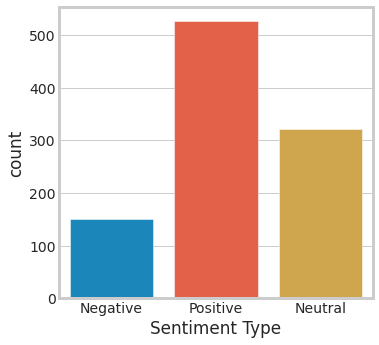

In [25]:
bloblist_title = list()

videos_title_str2=videos['tags']
for row in videos_title_str2:
    blob = TextBlob(row)
    bloblist_title.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    videos_polarity_title2 = pd.DataFrame(bloblist_title, columns = ['sentence','sentiment','polarity'])
 
def f_title(videos_polarity_title2):
    if videos_polarity_title2['sentiment'] > 0:
        val = "Positive"
    elif videos_polarity_title2['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

videos_polarity_title2['Sentiment Type'] = videos_polarity_title2.apply(f_title, axis=1)

plt.figure(figsize=(5,5))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment Type", data=videos_polarity_title2)

In [12]:
#As we can see, tags generated more positive than neutral words, so to dive deeper we will examine some words that resulted in positive sentiment

test_index=(videos_polarity_title2['sentiment'] >0)
positive_words=videos_polarity_title2[test_index]
positive_words[:15]

,sentence,sentiment,polarity,Sentiment_Type
2,marvel comics comic books nerdy geeky super he...,0.291667,0.583333,Positive
4,bad bunny amorfoda dura daddy yankee ozuna rom...,0.133333,0.688889,Positive
10,marvel comics comic books nerd geek superhero ...,0.062500,0.508333,Positive
12,maluma music maluma official video maluma vide...,0.032468,0.334416,Positive
18,sanju teaser official teaser sanju official te...,0.136364,0.454545,Positive
19,edsheeran sheeran acoustic live cover official...,0.136364,0.500000,Positive
23,minute crafts diy crafts trucos trucos belliz...,0.104040,0.449447,Positive
24,super bowl super bowl commercial amazon amazon...,0.118519,0.392593,Positive
25,post malone new music stoney beer bongs bentle...,0.068182,0.227273,Positive
26,twice heart shaker twice heart shaker heart sh...,0.800000,1.000000,Positive


In [26]:
#Same with negative, from a human point of view they are mostly neutral
test_index=(videos_polarity_title2['sentiment'] <0)
negative_words=videos_polarity_title2[test_index]
negative_words[:15]

,sentence,sentiment,polarity,Sentiment Type
0,rewind rewind youtube rewind youtuberewind rew...,-0.200000,0.400000,Negative
1,childish gambino rap america mcdj recording rc...,-0.200000,0.800000,Negative
9,drake new music drake gods plan drake god plan...,-0.181818,0.727273,Negative
13,cardi like invasion privacy bad bunny balvin b...,-0.187879,0.373737,Negative
14,taylor swift delicate big machine records llc ...,-0.150000,0.500000,Negative
16,taylor swift end game big machine pop,-0.200000,0.250000,Negative
27,bad bunny bad bunny video oficial music video ...,-0.700000,0.666667,Negative
43,dua lipa idgaf don give fuck dua idgaf dua lip...,-0.110606,0.275758,Negative
44,eminem walk water aftermath shady interscope rap,-0.250000,0.625000,Negative
47,ridiculous giant anvil anvil giant anvil bask...,-0.131667,0.940000,Negative


In [ ]:
#From a human point of view the words do not seem very positive, they seem mostly neutral, even though the model identified as positive

Recommendation System

In [108]:
#1 Content based recommender using similar tags
videos['tags'].head()

0    rewind rewind youtube rewind youtuberewind rew...
1    childish gambino rap america mcdj recording rc...
2    marvel comics comic books nerdy geeky super he...
3    bighit bts bangtan fake love fake love fake love 
4    bad bunny amorfoda dura daddy yankee ozuna rom...
Name: tags, dtype: object

In [109]:
#TF-IDF is: Term Frequency - Inverse Document Frequency. It looks how many times a word appears into a document
#Also pays attention to how many times the same word appears in other documents overall
from sklearn.feature_extraction.text import TfidfVectorizer

#Remove all english stopwords. So common words like 'the' are removed to reduce noise, not weight down on the performance
tfidf = TfidfVectorizer(stop_words='english')

#Replace null values with an empty string
videos['tags'] = videos['tags'].fillna('')

#Construct the required TF-IDF matrix where each column represents a word in the overall document
tfidf_matrix = tfidf.fit_transform(videos['tags'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(1000, 6427)

In [110]:
#We can see that there are 6427 different words in the dataset of tags of 1000 YouTube videos

In [111]:
#Array mapping from feature integer indices to feature name.
tfidf.get_feature_names()[2000:2010]

['fight',
 'fighter',
 'fighters',
 'fights',
 'filal',
 'filet',
 'filipino',
 'film',
 'films',
 'filmselect']

In [112]:
# Import linear_kernel, using it instead of cosine_similarities() because it is faster
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim.shape

(1000, 1000)

In [113]:
#Create a index system given the video titles by using reverse mapping
indices = pd.Series(videos.index, index=videos['title']).drop_duplicates()
#test that the indices have been reversed
indices[:10]

title
youtube rewind  shape  youtuberewind                              0
childish gambino   america official video                         1
marvel studios avengers infinity war official trailer             2
bts fake love official mv                                         3
nicky jam x j balvin x equis video oficial prod afro bros jeon    4
luis fonsi demi lovato chame la culpa                             5
venom official trailer hd                                         6
  daughter                                                        7
maroon girls like  ft cardi b                                     8
drake god s plan                                                  9
dtype: int64

In [114]:
# Function that takes in video title as input and outputs most similar video suggestions
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all videos
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the videos based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 5 most similar videos
    sim_scores = sim_scores[1:7]

    # Get the video indices
    video_indices = [i[0] for i in sim_scores]

    # Return the top 6 most similar videos
    print("6 Recommended videos to *"+title+"* are:\n")
    print("Title|Channel Title\n")
    for mii in video_indices:
        print(videos['title'].iloc[mii] + " | "+ videos['channel_title'].iloc[mii])

In [131]:
get_recommendations('maroon three little birds')

6 Recommended videos to *maroon three little birds* are:

Title|Channel Title

maroon girls like  ft cardi b | maroon vevo
maroon wait | maroon vevo
maroon wait | maroon vevo
carpool karaoke w adam levine |  late late show  james corden
rita ora girls ft cardi b bebe rexha charli xcx official video  | rita ora
 toast vs toast | buzzfeedvideo


In [116]:
videos['description'] = videos.description.astype(str)

In [117]:
#Recommender system 2 using channel title and tags
def create_soup(x):
    return ''.join(x['tags']) + ''.join(x['channel_title'])

# Create a new soup feature, axis 1 as the function is applied to each row
videos['soup'] = videos.apply(create_soup, axis=1)

#Check that it has formatted correctly
videos[['soup']].head(5)

,soup
0,rewind rewind youtube rewind youtuberewind rew...
1,childish gambino rap america mcdj recording rc...
2,marvel comics comic books nerdy geeky super he...
3,bighit bts bangtan fake love fake love fake lo...
4,bad bunny amorfoda dura daddy yankee ozuna rom...


In [118]:
from sklearn.feature_extraction.text import CountVectorizer
#CountVectorizer: it counts the number of words in the document, using this vs. TfidfVectorizer so it doesn't penalize channels that has appeared in more videos

#Remove all english stopwords
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(videos['soup'])

count_matrix.shape

(1000, 6607)

In [119]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

# Reset index of your main DataFrame and construct reverse mapping as before
videos = videos.reset_index()
indices = pd.Series(videos.index, index=videos['title'])

In [130]:
get_recommendations('maroon three little birds', cosine_sim2)

6 Recommended videos to *maroon three little birds* are:

Title|Channel Title

maroon girls like  ft cardi b | maroon vevo
maroon wait | maroon vevo
maroon wait | maroon vevo
bruno mars  cardi b finesse live   th grammys  | vevo
rita ora girls ft cardi b bebe rexha charli xcx official video  | rita ora
carpool karaoke w adam levine |  late late show  james corden
